In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import os

In [2]:
import sklearn

## Plan  
- Divide each image into 9 equal chunks
- Compute the average of R, G and B for each chunk
- This gives 27 variables
- Fit some sort of model to these (nearest neighbours?)

In [3]:
#Read an example image and convert to RGB for matplotlib
img=cv2.imread("data/ad.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [4]:
codes=pd.read_csv("data/wikipedia-iso-country-codes.csv")

In [5]:
#Check dimensions
img.shape

(385, 550, 3)

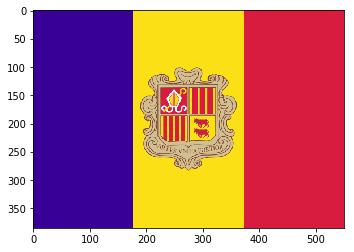

In [6]:
#Show the image
plt.imshow(img)

(<matplotlib.axes._subplots.AxesSubplot at 0x24555ccce80>,
 <matplotlib.image.AxesImage at 0x24555d22c18>)

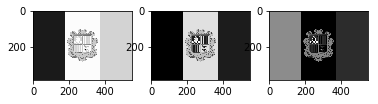

In [7]:
#Visualise the three different layers
plt.subplot(131),plt.imshow(img[:,:,0],cmap='gray')
plt.subplot(132),plt.imshow(img[:,:,1],cmap='gray')
plt.subplot(133),plt.imshow(img[:,:,2],cmap='gray')

In [8]:
dim = (5, 5)
img_small = cv2.resize(img,dim,interpolation = cv2.INTER_AREA)

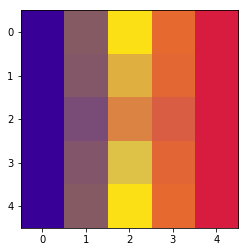

In [9]:
plt.imshow(img_small)

In [10]:
print(img_small)

[[[ 56   0 150]
  [134  90  99]
  [252 224  22]
  [230 106  47]
  [216  28  63]]

 [[ 56   0 150]
  [131  86 104]
  [223 175  64]
  [227 103  51]
  [216  28  63]]

 [[ 56   0 150]
  [121  76 119]
  [219 131  67]
  [217  93  67]
  [216  28  63]]

 [[ 56   0 150]
  [130  85 106]
  [222 194  71]
  [226 102  53]
  [216  28  63]]

 [[ 56   0 150]
  [134  90  99]
  [252 224  22]
  [230 106  47]
  [216  28  63]]]


array([[ 56,   0, 150, 134,  90,  99, 252, 224,  22, 230, 106,  47, 216,
         28,  63,  56,   0, 150, 131,  86, 104, 223, 175,  64, 227, 103,
         51, 216,  28,  63,  56,   0, 150, 121,  76, 119, 219, 131,  67,
        217,  93,  67, 216,  28,  63,  56,   0, 150, 130,  85, 106, 222,
        194,  71, 226, 102,  53, 216,  28,  63,  56,   0, 150, 134,  90,
         99, 252, 224,  22, 230, 106,  47, 216,  28,  63]], dtype=uint8)

In [11]:
#This is my training vector
x=img_small.flatten()
x

array([ 56,   0, 150, 134,  90,  99, 252, 224,  22, 230, 106,  47, 216,
        28,  63,  56,   0, 150, 131,  86, 104, 223, 175,  64, 227, 103,
        51, 216,  28,  63,  56,   0, 150, 121,  76, 119, 219, 131,  67,
       217,  93,  67, 216,  28,  63,  56,   0, 150, 130,  85, 106, 222,
       194,  71, 226, 102,  53, 216,  28,  63,  56,   0, 150, 134,  90,
        99, 252, 224,  22, 230, 106,  47, 216,  28,  63], dtype=uint8)

In [30]:
x=pd.Series(['a','b'])
y=pd.Series([1],index=[3])
x.append(y)

0    a
1    b
3    1
dtype: object

In [60]:
import os
directory = 'data/train'
out=pd.DataFrame()
i=0
for filename in os.listdir(directory):
    if filename.endswith(".png"):
        img=cv2.imread(directory + '/' + filename)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        dim = (5, 5)
        img_small = cv2.resize(img,dim,interpolation = cv2.INTER_AREA)
        #x=img_small.flatten()
        x=pd.Series(filename[0:2])
        y=pd.Series(img_small.flatten())
        v=x.append(y,ignore_index=True)
        out=out.append(v,ignore_index=True)
    else:
        continue

b=['v'+str(x) for x in range(1,76)]
b.insert(0,'cn')
out.columns=b

In [61]:
out

,cn,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75
0,ad,56.0,0.0,150.0,134.0,90.0,99.0,252.0,224.0,22.0,...,99.0,252.0,224.0,22.0,230.0,106.0,47.0,216.0,28.0,63.0
1,ae,206.0,17.0,38.0,51.0,120.0,9.0,0.0,154.0,0.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,af,0.0,0.0,0.0,64.0,0.0,0.0,191.0,0.0,0.0,...,0.0,191.0,0.0,0.0,63.0,102.0,0.0,0.0,153.0,0.0
3,ag,52.0,4.0,10.0,3.0,2.0,0.0,39.0,32.0,3.0,...,38.0,231.0,136.0,147.0,206.0,17.0,38.0,206.0,17.0,38.0
4,al,206.0,17.0,38.0,206.0,17.0,38.0,204.0,17.0,38.0,...,38.0,206.0,17.0,38.0,206.0,17.0,38.0,206.0,17.0,38.0
5,am,255.0,0.0,0.0,255.0,0.0,0.0,255.0,0.0,0.0,...,0.0,255.0,153.0,0.0,255.0,153.0,0.0,255.0,153.0,0.0
6,ao,206.0,17.0,38.0,206.0,17.0,38.0,206.0,17.0,38.0,...,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
7,ar,117.0,170.0,219.0,117.0,170.0,219.0,117.0,170.0,219.0,...,219.0,117.0,170.0,219.0,117.0,170.0,219.0,117.0,170.0,219.0
8,at,216.0,30.0,5.0,216.0,30.0,5.0,216.0,30.0,5.0,...,5.0,216.0,30.0,5.0,216.0,30.0,5.0,216.0,30.0,5.0
9,au,150.0,115.0,172.0,179.0,95.0,136.0,83.0,63.0,157.0,...,147.0,0.0,0.0,139.0,20.0,20.0,148.0,0.0,0.0,139.0


In [67]:
y=out['cn']
x=out.loc[:,out.columns !='cn']

In [70]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

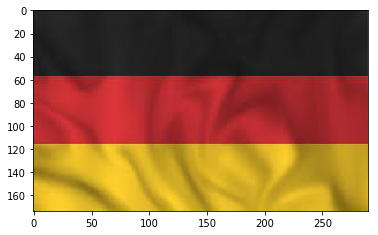

In [96]:
#Now try to test
testimg=cv2.imread("data/test/3jpg.jpg")
testimg = cv2.cvtColor(testimg, cv2.COLOR_BGR2RGB)
plt.imshow(testimg)

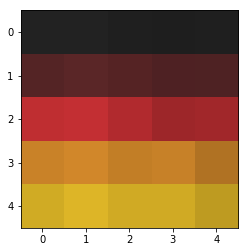

In [99]:
dim = (5, 5)
testimg_small = cv2.resize(testimg,dim,interpolation = cv2.INTER_AREA)
testvec=testimg_small.flatten()
plt.imshow(testimg_small)

In [98]:
testvec
knn.predict(testvec.reshape(1,-1))

array(['de'], dtype=object)

In [110]:
out.to_csv('out.csv')